## Imports

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
RAND_ST = 42

## Dataset Loading Functions

In [ ]:
def load_mnist_dataset():
    # HIDDEN 
    return X_train, X_val, Y_train, Y_val

Find the nearest neighbour (KNN with K=1) in the training set for all elements in the validation set and report the L2 loss between each paired element and the label accuracy. Display the nearest neighbour of the first 3 samples in the validation set as images.

In [ ]:
def find_knn(X_train, Y_train, X_val, Y_val, K):
    distances = np.sqrt(np.sum((np.expand_dims(X_train, axis=0)-np.expand_dims(X_val, axis=1))**2, axis=2))
    # NN neighbours
    nn_indices = np.argsort(distances, axis=1)[:,:K]

    # L2 Distances
    l2_distances = np.sum(np.sort(distances, axis=1)[:,:K]) / K

    # Predicted Labels
    labels = Y_train[nn_indices]
    predicted_labels = np.zeros([len(X_val)])
    for i in range(len(X_val)):
        unique_value, counts = np.unique(labels[i], return_counts=True)
        predicted_labels[i] = unique_value[np.argmax(counts)]
        
    # Accuracy
    accuracy = np.sum(Y_val==predicted_labels) / Y_val.shape[0]
    return X_train[nn_indices], Y_train[nn_indices], predicted_labels, l2_distances, accuracy

In [ ]:
# Loadding the MNIST dataset
X_train, X_val, Y_train, Y_val = load_mnist_dataset()

In [ ]:
K = 1
nn_neighbours, nn_labels, predicted_labels, l2_distances, accuracy = find_knn(X_train, Y_train, X_val, Y_val, K)
print('Value of the L2 Distances: ', np.round(l2_distances, 2))
print('Value of the accuracy', accuracy * 100, '%')

Value of the L2 Distances:  68736.59
Value of the accuracy 92.0 %


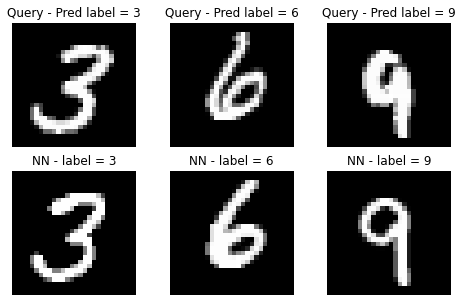

In [ ]:
n = int(np.sqrt(nn_neighbours.shape[2]))
queries = np.reshape(X_val, [-1, K, n, n])
nn_neighbours = np.reshape(nn_neighbours, [-1, K, n, n])
fig, axes = plt.subplots(2, 3, figsize=(8,5))
plt.rcParams['image.cmap'] = 'gray'
for i in range(3):
    axes[0,i].imshow(queries[i,0,:,:])
    axes[0,i].axis('off')
    axes[0,i].set_title("Query - Pred label = %d"%int(predicted_labels[i]))
    axes[1,i].imshow(nn_neighbours[i,0,:,:])
    axes[1,i].axis('off')
    axes[1,i].set_title("NN - label = %d"%int(nn_labels[i,0]))

Text(0, 0.5, 'Accuracy')

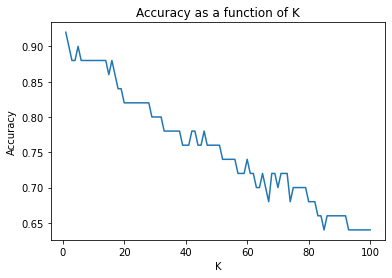

In [ ]:
# Changing the value of K for hte KNN search
Kmax = 100
accuracy_array = np.zeros([Kmax])
for K in range(1, Kmax+1):
    _, _, _, _, accuracy = find_knn(X_train, Y_train, X_val, Y_val, K)
    accuracy_array[K-1] = accuracy
plt.plot(np.arange(1, Kmax+1), accuracy_array)
plt.title('Accuracy as a function of K')
plt.xlabel('K')
plt.ylabel('Accuracy')

KNN is a method to predict the label of a sample by looking at the label of its nearest neighbours in the training set. We use a majority vote to decide the final label for that given sample. In the current experiment, we are getting a L2 loss of **XX** and an accuracy of **XX** for the validation set. We can see that the accuracy is quite high even though we are only comparing per pixel difference. We can notice that the accuracy will decrease with a higher K value as shown on the plot because it increases the noise coming from other classes.